In [10]:
%matplotlib inline
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))
from sklearn.cluster import MiniBatchKMeans
from model import Model
from sklearn.externals import joblib
import numpy as np
import matplotlib.pyplot as plt

In [13]:
INSPECT_RANGE = range(300, 1501, 200)

In [ ]:
embeddings = Model.load_model('word2vec').wv.syn0norm

In [7]:
def cluster(X, k):
    clf = MiniBatchKMeans(n_clusters=k, batch_size=500, init_size=10000, random_state=0)
    clf.fit(X)
    print(f'{k} clusters => SSE: {clf.inertia_}')
    return clf.inertia_

In [14]:
errors = []
for n in INSPECT_RANGE:
    errors.append(cluster(embeddings, n))

[2017-11-19 00:44:51][INFO][gensim.utils #load:278] loading Word2Vec object from /Users/vv001249/fun2vec/data/word2vec.model.gz
[2017-11-19 00:44:59][INFO][gensim.utils #load:284] loaded /Users/vv001249/fun2vec/data/word2vec.model.gz


-------------------------------word2vec-------------------------------
corpus size: 473万
vocab size: 72,413
loss: 5702.0万
SSE: 35189.8231882751
SSE: 33258.47044813633
SSE: 32113.721615195274
SSE: 31348.270636945963
SSE: 30811.305753976107
SSE: 30395.254613876343
SSE: 30047.37563621998


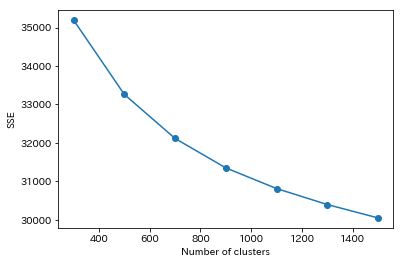

In [16]:
plt.plot(INSPECT_RANGE, errors, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()